In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import pandas as pd

df=pd.read_csv('student-mat.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
vars_mod = ['G3','Mjob', 'Fjob','G2','G1','age', 'Medu', 'Fedu', 'studytime','traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
vars_cat_mod = ['Mjob', 'Fjob']
vars_cuant_mod = ['G2','G1','age', 'Medu', 'Fedu', 'studytime','traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Datos = df[vars_mod].dropna()
Datos.head()
Dicos = pd.get_dummies(Datos[vars_cat_mod], drop_first = True)
X = pd.concat([Dicos, Datos[vars_cuant_mod]], axis=1)
Y = Datos.G3
X.head()

,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,G2,G1,...,studytime,traveltime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,False,False,False,False,False,False,False,True,6,5,...,2,2,0,4,3,4,1,1,3,6
1,False,False,False,False,False,True,False,False,5,5,...,2,1,0,5,3,3,1,1,3,4
2,False,False,False,False,False,True,False,False,8,7,...,2,1,3,4,3,2,2,3,3,10
3,True,False,False,False,False,False,True,False,14,15,...,3,1,0,3,2,2,1,1,5,2
4,False,True,False,False,False,True,False,False,10,6,...,2,1,0,4,3,2,1,2,5,4


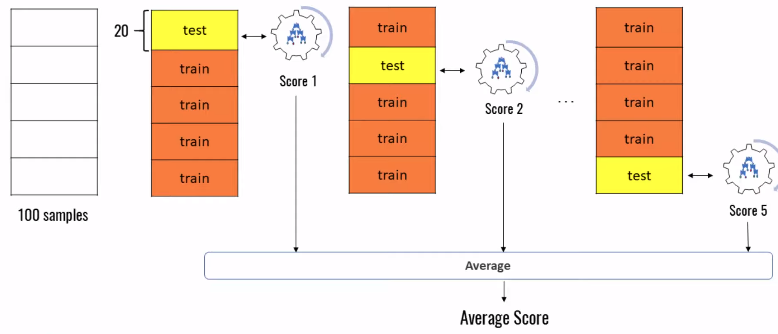

In [6]:
def modelos(X,Y):
  reg = LinearRegression()
 
  mses = cross_val_score(reg, X, Y, scoring='neg_mean_squared_error', cv=5)
  lambdas = {'alpha': np.arange(1, 100)}
  rid = Ridge ()
  ridges = GridSearchCV(rid, lambdas, scoring='neg_mean_squared_error', cv=5)
  ridges.fit(X, Y)
  las = Lasso()
  lasos = GridSearchCV(las, lambdas, scoring='neg_mean_squared_error', cv=5)
  lasos.fit(X, Y)
  print('reg lineal: ', np.mean(mses))
  print('hiperparam ridge: ', ridges.best_params_)
  print('reg ridge: ',ridges.best_score_)
  print('hiperparam lasso: ', lasos.best_params_)
  print('reg lasso: ',lasos.best_score_)

In [7]:
modelos(X,Y)

reg lineal:  -3.9696503576051265
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -3.7942140477218858
hiperparam lasso:  {'alpha': np.int64(1)}
reg lasso:  -3.8920182195069173


In [8]:
vars_mod2 = ['G3','school','sex','address','famsize','Pstatus','guardian','activities','nursery','internet','Mjob', 'Fjob','G2','G1','age', 'Medu', 'Fedu', 'studytime','traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
vars_cat_mod2 = ['school','sex','address','famsize','Pstatus','guardian','activities','nursery','internet','Mjob', 'Fjob']
vars_cuant_mod2 = ['G2','G1','age', 'Medu', 'Fedu', 'studytime','traveltime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Datos2 = df[vars_mod2].dropna()
Datos2.head()
Dicos2 = pd.get_dummies(Datos2[vars_cat_mod2], drop_first = True)
X2 = pd.concat([Dicos2, Datos2[vars_cuant_mod2]], axis=1)
Y2 = Datos2.G3

In [9]:
modelos(X2,Y2)

reg lineal:  -1.485284060368308e+25
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -3.845027422686884
hiperparam lasso:  {'alpha': np.int64(1)}
reg lasso:  -3.8920182195069173


In [10]:
Y = Datos.G3
for i in range(1,4):
  Xi = PolynomialFeatures(i).fit_transform(Datos[vars_cuant_mod]) #var cuant de grado i
  print('Modelo polinomial para grado', i)
  modelos(Xi, Y)

Modelo polinomial para grado 1
reg lineal:  -3.843022624431228
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -3.772109923853401
hiperparam lasso:  {'alpha': np.int64(1)}
reg lasso:  -3.8920182195069173
Modelo polinomial para grado 2
reg lineal:  -9.700944788073915
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -5.051021433294446
hiperparam lasso:  {'alpha': np.int64(1)}
reg lasso:  -3.5368510405157045
Modelo polinomial para grado 3
reg lineal:  -276.93134792668934
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -135.67934613749898
hiperparam lasso:  {'alpha': np.int64(55)}
reg lasso:  -3.6483590599420124


In [11]:
Dicos = pd.get_dummies(Datos[vars_cat_mod], drop_first = True)
Y = Datos.G3

for i in range(1,4):
  Xi = PolynomialFeatures(i).fit_transform(Datos[vars_cuant_mod])

Xi = pd.DataFrame(Xi, index = Datos.index.values)


Xi = pd.concat([Dicos, Xi], axis=1,ignore_index=True)
print('Modelo con dicotómicas y polinomial de grado', i)
modelos(Xi, Y)

Modelo con dicotómicas y polinomial de grado 3
reg lineal:  -283.4167011966359
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -136.3442181330998
hiperparam lasso:  {'alpha': np.int64(55)}
reg lasso:  -3.6483590599420124


2.	Importar los datos de math-students  en un notebook de Python y aplicar lo siguiente:
a.	Realizar una regresión lineal de la nota del primer período (G1) en función de la edad (age), tiempo de estudio (studytime) y faltas (absences). 
Evaluar ésta regresión con la métrica Error Cuadrático Medio


In [12]:
#edad,tiempo de estudio,absences
vars_mod3 = ['G1','age', 'studytime','absences']
vars_cuant_g3 = ['age', 'studytime','absences']
Datos3 = df[vars_mod3]
Datos3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   age        395 non-null    int64
 2   studytime  395 non-null    int64
 3   absences   395 non-null    int64
dtypes: int64(4)
memory usage: 12.5 KB


In [13]:
Datos3 = df[vars_mod3].dropna()
Y3  =  Datos3['G1']
X3 =   pd.concat([Datos3[vars_cuant_g3]], axis=1)

In [14]:
Y3

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

In [15]:
X3

,age,studytime,absences
0,18,2,6
1,17,2,4
2,15,2,10
3,15,3,2
4,16,2,4
...,...,...,...
390,20,2,11
391,17,1,3
392,21,1,3
393,18,1,0


In [16]:
modelos(X3,Y3)

reg lineal:  -11.332069849418655
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -11.230563449677698
hiperparam lasso:  {'alpha': np.int64(2)}
reg lasso:  -11.106885915718635


b.	Aplicar regresiones polinómicas de grados 1, 2 y 3 al modelo anterior, es decir, la nota del primer período (G1) en función de la edad (age), tiempo de estudio (studytime) y faltas (absences). Obtener MSE de éstos modelos. ¿cuál tiene mejor ajuste? ¿cuál tiene el menor error cuadrático medio?

In [17]:
for i in range(1,4):
  Xi = PolynomialFeatures(i).fit_transform(Datos3[vars_cuant_g3])
  Xi = pd.DataFrame(Xi, index = Datos3.index.values)
#Xi = pd.concat([Dicos, Xi], axis=1,ignore_index=True)
  print('Modelo con dicotómicas y polinomial de grado', i)
  modelos(Xi, Y)
  sept="*"*50
  print(sept)

Modelo con dicotómicas y polinomial de grado 1
reg lineal:  -20.98179117600489
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -20.89213904064184
hiperparam lasso:  {'alpha': np.int64(4)}
reg lasso:  -21.256092773593977
**************************************************
Modelo con dicotómicas y polinomial de grado 2
reg lineal:  -20.868083596868843
hiperparam ridge:  {'alpha': np.int64(8)}
reg ridge:  -20.707108971430348
hiperparam lasso:  {'alpha': np.int64(2)}
reg lasso:  -20.801918509987033
**************************************************
Modelo con dicotómicas y polinomial de grado 3
reg lineal:  -24.146755974498046
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -23.515418599580272
hiperparam lasso:  {'alpha': np.int64(99)}
reg lasso:  -20.98628130487672
**************************************************


c.	Al modelo de regresión, de la nota del primer período (G1) en función de la edad (age), tiempo de estudio (studytime) y faltas (absences); añadir dos variables categóricas como independientes: el sexo (sex) y apoyo educacional familiar (famsup). Obtener MSE de ésta regresión y comparar con los anteriores modelos estimados.

In [18]:
vars_mod4 = ['G1','age', 'studytime','absences','sex','famsup']
vars_cat_mod4 = ['sex','famsup']
vars_cuant_g4 = ['age', 'studytime','absences']
Datos4 = df[vars_mod4].dropna()
Y4  =  Datos4['G1']
Dicos4 = pd.get_dummies(Datos4[vars_cat_mod4], drop_first = True)
X4 = pd.concat([Dicos4,Datos4[vars_cuant_g4]], axis=1)

In [19]:
Y4

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

In [20]:
X4

,sex_M,famsup_yes,age,studytime,absences
0,False,False,18,2,6
1,False,True,17,2,4
2,False,False,15,2,10
3,False,True,15,3,2
4,False,True,16,2,4
...,...,...,...,...,...
390,True,True,20,2,11
391,True,False,17,1,3
392,True,False,21,1,3
393,True,False,18,1,0


In [21]:
modelos(X4,Y4)

reg lineal:  -11.385098347539174
hiperparam ridge:  {'alpha': np.int64(99)}
reg ridge:  -11.18222650219742
hiperparam lasso:  {'alpha': np.int64(2)}
reg lasso:  -11.106885915718635


In [22]:
for i in range(1,4):
  Xi = PolynomialFeatures(i).fit_transform(Datos4[vars_cuant_g4])
  Xi = pd.DataFrame(Xi, index = Datos4.index.values)
  Xi = pd.concat([Dicos4, Xi], axis=1,ignore_index=True)
  print('Modelo con dicotómicas y polinomial de grado', i)
  modelos(Xi, Y)
  sept="*"*50
  print(sept)

Modelo con dicotómicas y polinomial de grado 1
reg lineal:  -20.969155886051766
hiperparam ridge:  {'alpha': np.int64(83)}
reg ridge:  -20.76194793656972
hiperparam lasso:  {'alpha': np.int64(4)}
reg lasso:  -21.256092773593977
**************************************************
Modelo con dicotómicas y polinomial de grado 2
reg lineal:  -20.745826273490117
hiperparam ridge:  {'alpha': np.int64(32)}
reg ridge:  -20.5425525037321
hiperparam lasso:  {'alpha': np.int64(2)}
reg lasso:  -20.801918509987033
**************************************************
Modelo con dicotómicas y polinomial de grado 3
reg lineal:  -23.603246313051198
hiperparam ridge:  {'alpha': np.int64(23)}
reg ridge:  -23.00247745426205
hiperparam lasso:  {'alpha': np.int64(99)}
reg lasso:  -20.986281304876716
**************************************************


In [78]:
for i in range(4,5):
  Xi = PolynomialFeatures(i).fit_transform(Datos4[vars_cuant_g4])
  Xi = pd.DataFrame(Xi, index = Datos4.index.values)
  Xi = pd.concat([Dicos4, Xi], axis=1,ignore_index=True)
#Xi = pd.concat([Dicos, Xi], axis=1,ignore_index=True)
  print('Modelo con dicotómicas y polinomial de grado', i)
  modelos(Xi, Y)
  sept="*"*50
  print(sept)

Modelo con dicotómicas y polinomial de grado 4
reg lineal:  -580.1788024749492
hiperparam ridge:  {'alpha': 99}
reg ridge:  -428.789514526572
hiperparam lasso:  {'alpha': 40}
reg lasso:  -20.741698407108267
**************************************************
